In [ ]:
import pandas as pd
import numpy as np
import json


# **Carga de datos***

In [ ]:
# Cargar el JSON desde la URL
url = 'https://gist.githubusercontent.com/ahcamachod/4b964953032a2078d67052ec8fb92e72/raw/8106d7c3f001390744ec3aa657b9847f306c9df8/zoop_supermercado.json'

df = pd.read_json(url)


# **Exporación de los Datos**

In [ ]:
df.head

<bound method NDFrame.head of      item_identificador tienda_identificador  ventas_totales  \
0                 FDB08               OUT018       176503.58   
1                 DRQ35               OUT049       185758.20   
2                 FDD14               OUT018       165983.94   
3                 FDY37               OUT045       314923.40   
4                 FDY59               OUT018        64782.34   
...                 ...                  ...             ...   
8545              FDY08               OUT010        28096.76   
8546              FDC41               OUT017       130163.90   
8547              NCQ53               OUT045       614533.40   
8548              FDL46               OUT017       164985.24   
8549              NCN30               OUT046        96541.00   

                                                   item  \
0     {'item_peso': 6.055, 'item_contenido_grasa': '...   
1     {'item_peso': 9.3, 'item_contenido_grasa': 'Ba...   
2     {'item_peso': 20.7, 'item_contenido_grasa': 'B...   
3     {'item_peso': 17.0, 'item_contenido_grasa': 'R...   
4     {'item_peso': 8.195, 'item_contenido_grasa': '...   
...                                                 ...   
8545  {'item_peso': 9.395, 'item_contenido_grasa': '...   
8546  {'item_peso': 15.6, 'item_contenido_grasa': 'B...   
8547  {'item_peso': 17.6, 'item_contenido_grasa': 'B...   
8548  {'item_peso': 20.35, 'item_contenido_grasa': '...   
8549  {'item_peso': 16.35, 'item_contenido_grasa': '...   

                                                 tienda  
0     {'tienda_ano_establecimiento': 2019, 'tienda_t...  
1     {'tienda_ano_establecimiento': 2009, 'tienda_t...  
2     {'tienda_ano_establecimiento': 2019, 'tienda_t...  
3     {'tienda_ano_establecimiento': 2012, 'tienda_t...  
4     {'tienda_ano_establecimiento': 2019, 'tienda_t...  
...                                                 ...  
8545  {'tienda_ano_establecimiento': 2008, 'tienda_t...  
8546  {'tienda_ano_establecimiento': 2017, 'tienda_t...  
8547  {'tienda_ano_establecimiento': 2012, 'tienda_t...  
8548  {'tienda_ano_establecimiento': 2017, 'tienda_t...  
8549  {'tienda_ano_establecimiento': 2007, 'tienda_t...  

[8550 rows x 5 columns]>

In [ ]:
item_df = pd.json_normalize(df['item'])
tienda_df = pd.json_normalize(df['tienda'])


# Concatenar los DataFrames expandidos con el DataFrame original (excluyendo las columnas originales 'item' y 'tienda')
df = pd.concat([df.drop(['item', 'tienda'], axis=1), item_df, tienda_df], axis=1)


df.head()

,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,item_cantidad_venta,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
0,FDB08,OUT018,176503.58,6.055,Bajo Contenido de Grasa,0.031230,Frutas y Vegetales,160.36,None,2019,Medio,Nivel 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Bajo Contenido de Grasa,0.042357,Bebidas Alcohólicas,123.24,None,2009,Medio,Nivel 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Bajo Contenido de Grasa,0.170500,Enlatados,184.13,None,2019,Medio,Nivel 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nivel 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Bajo Contenido de Grasa,0.000000,Dulcería,93.15,None,2019,Medio,Nivel 3,Supermercado Tipo 2


In [ ]:
df.tail()

,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,item_cantidad_venta,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
8545,FDY08,OUT010,28096.76,9.395,Regular,0.286345,Frutas y Vegetales,139.18,None,2008,None,Nivel 3,Mercado
8546,FDC41,OUT017,130163.90,15.600,Bajo Contenido de Grasa,0.117575,Alimentos Congelados,75.67,None,2017,None,Nivel 2,Supermercado Tipo 1
8547,NCQ53,OUT045,614533.40,17.600,Bajo Contenido de Grasa,0.018944,Abarrotes,237.36,None,2012,None,Nivel 2,Supermercado Tipo 1
8548,FDL46,OUT017,164985.24,20.350,bajo contenido de grasa,0.054363,Snacks,117.95,None,2017,None,Nivel 2,Supermercado Tipo 1
8549,NCN30,OUT046,96541.00,16.350,BCG,0.016993,Cereales,95.74,None,2007,Pequeño,Nivel 1,Supermercado Tipo 1


In [ ]:
# Verificar las dimensiones del DataFrame (número de registros y columnas)
df.shape

(8550, 13)

In [ ]:
# Verificar el tipo de datos de cada columna
df.dtypes

,0
item_identificador,object
tienda_identificador,object
ventas_totales,float64
item_peso,float64
item_contenido_grasa,object
item_visibilidad,float64
item_tipo,object
item_precio,float64
item_cantidad_venta,object
tienda_ano_establecimiento,int64


In [ ]:
#en la tabla df.dtypes vimos los tipos de datos y esta vamos a ver el resumen estadistico  de los tipos de datos float64 e int es decir tipos de datos(Cuantitativos - numericos )
df.describe()

,ventas_totales,item_peso,item_visibilidad,item_precio,tienda_ano_establecimiento
count,8.550000e+03,7081.000000,8550.000000,8550.000000,8550.000000
mean,2.181949e+05,12.855023,0.066150,141.007453,2007.830409
std,1.708098e+05,4.643508,0.051578,62.333062,8.372541
min,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,8.349132e+04,8.770000,0.027024,93.787500,1997.000000
50%,1.794331e+05,12.600000,0.053978,142.935000,2009.000000
75%,3.100963e+05,16.850000,0.094646,185.760000,2014.000000
max,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


In [ ]:
#para ver los valores faltantes
#df.info(memory_usage='deep')- par ver uso real de memoria
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   item_identificador          8550 non-null   object 
 1   tienda_identificador        8550 non-null   object 
 2   ventas_totales              8550 non-null   float64
 3   item_peso                   7081 non-null   float64
 4   item_contenido_grasa        8550 non-null   object 
 5   item_visibilidad            8550 non-null   float64
 6   item_tipo                   8550 non-null   object 
 7   item_precio                 8550 non-null   float64
 8   item_cantidad_venta         0 non-null      object 
 9   tienda_ano_establecimiento  8550 non-null   int64  
 10  tienda_tamano               6133 non-null   object 
 11  tienda_tipo_ubicacion       8550 non-null   object 
 12  tienda_tipo                 8550 non-null   object 
dtypes: float64(4), int64(1), object(8

In [ ]:
#Esto ayuda a detectar columnas con datos incompletos y definir estrategias para manejar los valores ausentes
df.isnull().sum()


,0
item_identificador,0
tienda_identificador,0
ventas_totales,0
item_peso,0
item_contenido_grasa,0
item_visibilidad,0
item_tipo,0
item_precio,0
tienda_ano_establecimiento,0
tienda_tamano,0


In [ ]:
#Cantidad de registros duplicados
df.duplicated().sum()

np.int64(27)

In [ ]:
#Estadísticas descritivas también para columnas no numéricas (objetos)
df.describe(include='object')

,item_identificador,tienda_identificador,item_contenido_grasa,item_tipo,item_cantidad_venta,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
count,8550,8550,8550,8550,0,6133,8550,8550
unique,1559,10,5,16,0,3,3,4
top,FDU12,OUT027,Bajo Contenido de Grasa,Frutas y Vegetales,NaN,Medio,Nivel 3,Supermercado Tipo 1
freq,10,940,5101,1234,NaN,2805,3362,5593


In [ ]:
# Ver la cantidad de valores únicos por columna
df.nunique()

,0
item_identificador,1559
tienda_identificador,10
ventas_totales,3493
item_peso,415
item_contenido_grasa,5
item_visibilidad,7880
item_tipo,16
item_precio,4839
item_cantidad_venta,0
tienda_ano_establecimiento,9


In [ ]:
# Comprobar si hay filas con IDs duplicados (ejemplo: misma tienda y mismo item)
df.duplicated(subset=['item_identificador', 'tienda_identificador']).sum()


np.int64(27)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
item_identificador,0
tienda_identificador,0
ventas_totales,0
item_peso,1463
item_contenido_grasa,0
item_visibilidad,0
item_tipo,0
item_precio,0
item_cantidad_venta,8523
tienda_ano_establecimiento,0


In [ ]:
#iloc para ver un rago especifico de columnas
df.iloc[500:551]


,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,item_cantidad_venta,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
500,FDJ45,OUT045,83091.84,17.750,bajo contenido de grasa,0.073560,Mariscos,33.92,None,2012,None,Nivel 2,Supermercado Tipo 1
501,NCI55,OUT013,36552.42,18.600,Bajo Contenido de Grasa,0.012643,Cereales,119.84,None,1997,Grande,Nivel 3,Supermercado Tipo 1
502,FDD26,OUT045,333166.32,8.710,Regular,0.072302,Enlatados,185.69,None,2012,None,Nivel 2,Supermercado Tipo 1
503,NCD07,OUT017,239088.78,9.100,BCG,0.000000,Cereales,115.45,None,2017,None,Nivel 2,Supermercado Tipo 1
504,FDN24,OUT027,131029.44,NaN,BCG,0.112719,Dulcería,54.30,None,1995,Medio,Nivel 3,Supermercado Tipo 3
505,NCU54,OUT049,713071.80,8.880,Bajo Contenido de Grasa,0.098776,Cereales,208.93,None,2009,Medio,Nivel 1,Supermercado Tipo 1
506,FDR23,OUT045,264655.50,15.850,Bajo Contenido de Grasa,0.081953,Panadería,176.24,None,2012,None,Nivel 2,Supermercado Tipo 1
507,FDW45,OUT017,264855.24,18.000,Bajo Contenido de Grasa,0.039232,Snacks,145.14,None,2017,None,Nivel 2,Supermercado Tipo 1
508,NCK53,OUT010,59522.52,11.600,Bajo Contenido de Grasa,0.062903,Abarrotes,100.40,None,2008,None,Nivel 3,Mercado
509,FDH05,OUT035,602415.84,14.350,Regular,0.090896,Alimentos Congelados,231.30,None,2014,Pequeño,Nivel 2,Supermercado Tipo 1


In [ ]:
df[df['item_peso'].isnull()]

,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,item_cantidad_venta,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
7,FDH17,OUT019,29361.78,NaN,Regular,0.029158,Alimentos Congelados,97.07,None,1995,Pequeño,Nivel 1,Mercado
13,NCE54,OUT019,15047.08,NaN,Bajo Contenido de Grasa,0.047098,Cereales,75.54,None,1995,Pequeño,Nivel 1,Mercado
16,NCI17,OUT027,251006.60,NaN,Bajo Contenido de Grasa,0.142728,Abarrotes,95.14,None,1995,Medio,Nivel 3,Supermercado Tipo 3
18,DRI01,OUT027,500082.38,NaN,Bajo Contenido de Grasa,0.034286,Bebidas No Alcohólicas,173.14,None,1995,Medio,Nivel 3,Supermercado Tipo 3
20,FDH08,OUT019,45940.20,NaN,Bajo Contenido de Grasa,0.030516,Frutas y Vegetales,227.80,None,1995,Pequeño,Nivel 1,Mercado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,FDL21,OUT019,7989.60,NaN,Regular,0.012512,Snacks,38.75,None,1995,Pequeño,Nivel 1,Mercado
8522,DRG01,OUT027,267984.50,NaN,Bajo Contenido de Grasa,0.044661,Bebidas No Alcohólicas,74.77,None,1995,Medio,Nivel 3,Supermercado Tipo 3
8531,FDU23,OUT027,247677.60,NaN,BCG,0.021618,Panadería,167.12,None,1995,Medio,Nivel 3,Supermercado Tipo 3
8536,FDS28,OUT027,137421.12,NaN,Regular,0.082003,Alimentos Congelados,59.26,None,1995,Medio,Nivel 3,Supermercado Tipo 3


In [ ]:
df[df['tienda_identificador'] == 'OUT027']

,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,item_cantidad_venta,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
16,NCI17,OUT027,251006.60,NaN,Bajo Contenido de Grasa,0.142728,Abarrotes,95.14,None,1995,Medio,Nivel 3,Supermercado Tipo 3
18,DRI01,OUT027,500082.38,NaN,Bajo Contenido de Grasa,0.034286,Bebidas No Alcohólicas,173.14,None,1995,Medio,Nivel 3,Supermercado Tipo 3
29,FDB59,OUT027,416657.64,NaN,Bajo Contenido de Grasa,0.015205,Snacks,197.21,None,1995,Medio,Nivel 3,Supermercado Tipo 3
41,FDU50,OUT027,343552.80,NaN,Regular,0.074806,Lácteos,112.92,None,1995,Medio,Nivel 3,Supermercado Tipo 3
43,FDH26,OUT027,239954.32,NaN,Regular,0.034532,Enlatados,142.25,None,1995,Medio,Nivel 3,Supermercado Tipo 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8506,FDO04,OUT027,60787.54,NaN,Bajo Contenido de Grasa,0.026409,Alimentos Congelados,53.26,None,1995,Medio,Nivel 3,Supermercado Tipo 3
8512,FDV36,OUT027,341555.40,NaN,Bajo Contenido de Grasa,0.026175,Dulcería,127.10,None,1995,Medio,Nivel 3,Supermercado Tipo 3
8522,DRG01,OUT027,267984.50,NaN,Bajo Contenido de Grasa,0.044661,Bebidas No Alcohólicas,74.77,None,1995,Medio,Nivel 3,Supermercado Tipo 3
8531,FDU23,OUT027,247677.60,NaN,BCG,0.021618,Panadería,167.12,None,1995,Medio,Nivel 3,Supermercado Tipo 3


In [ ]:
df['item_peso'].mean()

np.float64(12.857645184135977)

# Limpieza de Datos


In [ ]:
#eliminar la columna item_cantidad_venta
df = df.drop(columns=['item_cantidad_venta'])

In [ ]:
#Rellenar los valores null con la media
# Esto aplica para el ejercicio pero no siempre funciona para casos donde se este entrenando un modelo maching learning
df['item_peso'] = df['item_peso'].fillna(df['item_peso'].mean())

In [ ]:
#Cambiar los valores vacios por la palabra 'Desconocido'
df['tienda_tamano'] = df['tienda_tamano'].fillna('Desconocido')

In [ ]:
df.describe()

,ventas_totales,item_peso,item_visibilidad,item_precio,tienda_ano_establecimiento
count,8.523000e+03,8523.000000,8523.000000,8523.000000,8523.000000
mean,2.181289e+05,12.857645,0.066132,140.992810,2007.831867
std,1.706500e+05,4.226124,0.051598,62.275166,8.371760
min,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,8.342474e+04,9.310000,0.026989,93.825000,1997.000000
50%,1.794331e+05,12.857645,0.053931,143.010000,2009.000000
75%,3.101296e+05,16.000000,0.094585,185.645000,2014.000000
max,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


In [ ]:
df.nunique()

,0
item_identificador,1559
tienda_identificador,10
ventas_totales,3493
item_peso,416
item_contenido_grasa,5
item_visibilidad,7880
item_tipo,16
item_precio,4839
tienda_ano_establecimiento,9
tienda_tamano,4


In [ ]:
df['item_contenido_grasa'].value_counts().index

Index(['Bajo Contenido de Grasa', 'Regular'], dtype='object', name='item_contenido_grasa')

In [ ]:
df['item_contenido_grasa'] = df['item_contenido_grasa'].replace({
    'bajo contenido de grasa': 'Bajo Contenido de Grasa',
    'BCG': 'Bajo Contenido de Grasa',
    'reg': 'Regular'
})


# Visualización

In [ ]:
ventas_por_tamano = df.groupby('tienda_tamano')['ventas_totales'].sum().reset_index()


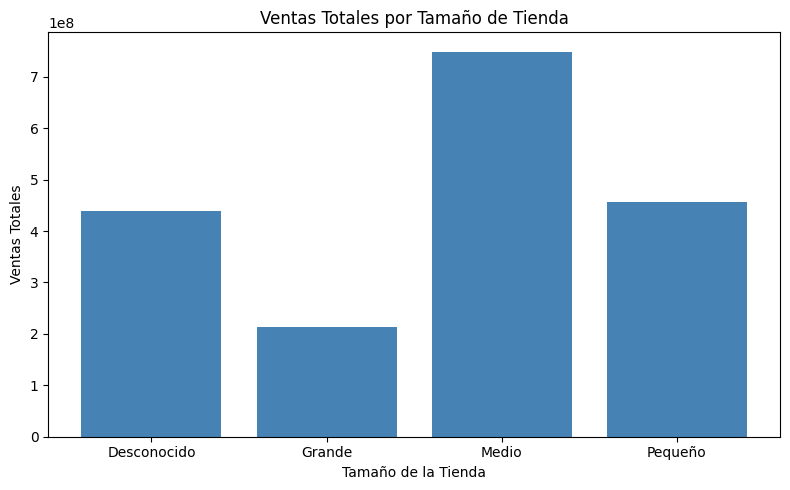

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(ventas_por_tamano['tienda_tamano'], ventas_por_tamano['ventas_totales'], color='steelblue')
plt.title('Ventas Totales por Tamaño de Tienda')
plt.xlabel('Tamaño de la Tienda')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


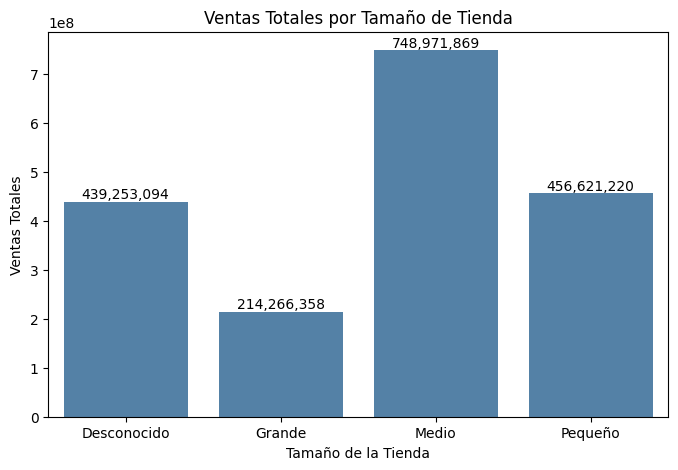

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.title('Ventas Totales por Tamaño de Tienda')
plt.xlabel('Tamaño de la Tienda')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=0)
grafico = sns.barplot(data=ventas_por_tamano, x='tienda_tamano', y='ventas_totales', color='steelblue')

# Agregar etiquetas encima de cada barra
for bar in grafico.patches:
    altura = bar.get_height()
    grafico.text(bar.get_x() + bar.get_width()/2,
                 altura,
                 f'{altura:,.0f}',
                 ha='center', va='bottom')


<ipython-input-224-8cc4351f244d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='tienda_tamano', y='ventas_totales', estimator='sum', palette='pastel')


<Axes: title={'center': 'Ventas Totales por Tamaño de Tienda'}, xlabel='tienda_tamano', ylabel='ventas_totales'>

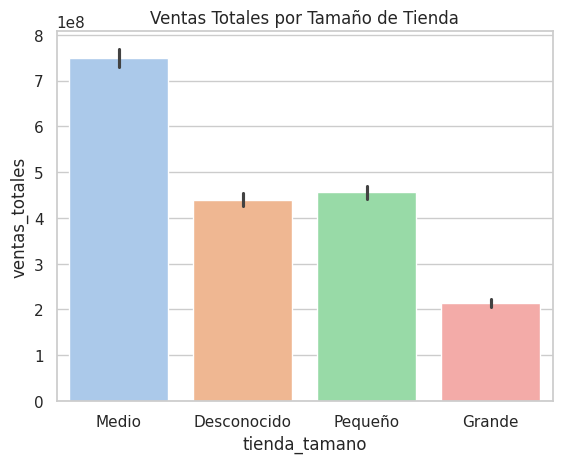

In [ ]:
plt.title('Ventas Totales por Tamaño de Tienda')
sns.barplot(data=df, x='tienda_tamano', y='ventas_totales', estimator='sum', palette='pastel')


<ipython-input-225-40806afac956>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='item_contenido_grasa', y='ventas_totales', estimator='sum', palette='pastel')


<Axes: title={'center': 'Ventas Totales por Contenido de Grasa'}, xlabel='item_contenido_grasa', ylabel='ventas_totales'>

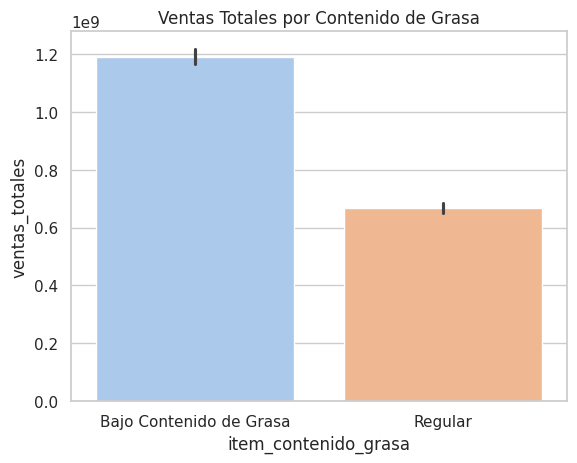

In [ ]:
plt.title('Ventas Totales por Contenido de Grasa')
sns.barplot(data=df, x='item_contenido_grasa', y='ventas_totales', estimator='sum', palette='pastel')

In [ ]:
df.head()


,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
0,FDB08,OUT018,176503.58,6.055,Bajo Contenido de Grasa,0.031230,Frutas y Vegetales,160.36,2019,Medio,Nivel 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Bajo Contenido de Grasa,0.042357,Bebidas Alcohólicas,123.24,2009,Medio,Nivel 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Bajo Contenido de Grasa,0.170500,Enlatados,184.13,2019,Medio,Nivel 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,2012,Desconocido,Nivel 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Bajo Contenido de Grasa,0.000000,Dulcería,93.15,2019,Medio,Nivel 3,Supermercado Tipo 2


# Grafico generado revisando la documentacion de Seaborn

<Axes: title={'center': 'Ventas Totales por Tamaño de Tienda'}, xlabel='Categoria Producto', ylabel='Ventas Totales'>

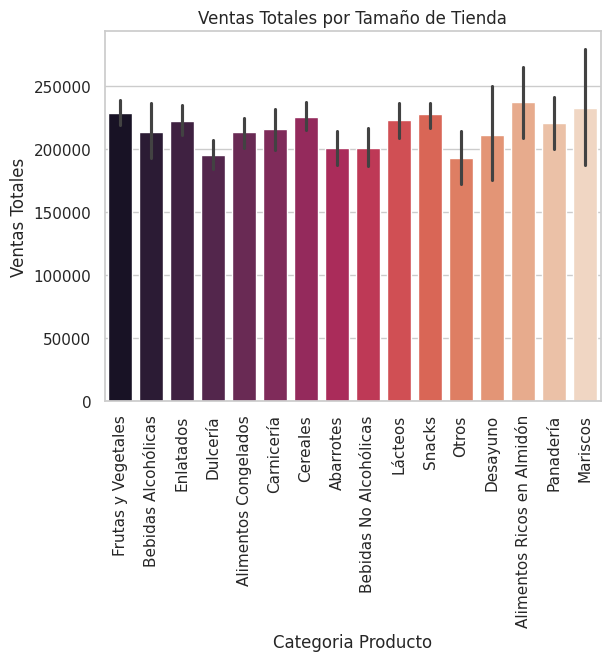

In [ ]:
plt.title('Ventas Totales por Tamaño de Tienda')
plt.ylabel('Ventas Totales')
plt.xlabel('Categoria Producto')
plt.xticks(rotation=90)
sns.barplot(df, x="item_tipo", y="ventas_totales", hue="item_tipo" , palette='rocket')



# Grafico generado con Chat Gpt
Prompt:
El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "tienda_tamano" con 4 categorías de tamaño para tiendas: 'Grande', 'Medio', 'Pequeño' y 'No registrado'.

Deseo crear una visualización que permita identificar el total obtenido en ventas para las cuatro categorías de tamaño de tienda y representarlas en un gráfico de barras.

Los datos en la columna "ventas_totales" necesitan ser agrupados por las categorías de "tienda_tamano".

La figura del gráfico debe seguir la identidad visual de la tienda, con el fondo de la figura y del gráfico en color "#ebebeb" y las barras en color "#e23155".

Además, es necesario mostrar el total de las ventas en millones encima de cada columna, con el texto de esta información en color "#19325c" y la estructura "MXN $ valor M".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.




<ipython-input-254-a5cb1dfe7e89>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_tamano, x='tienda_tamano', y='ventas_totales', palette=['#e23155'])
<ipython-input-254-a5cb1dfe7e89>:14: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_por_tamano, x='tienda_tamano', y='ventas_totales', palette=['#e23155'])


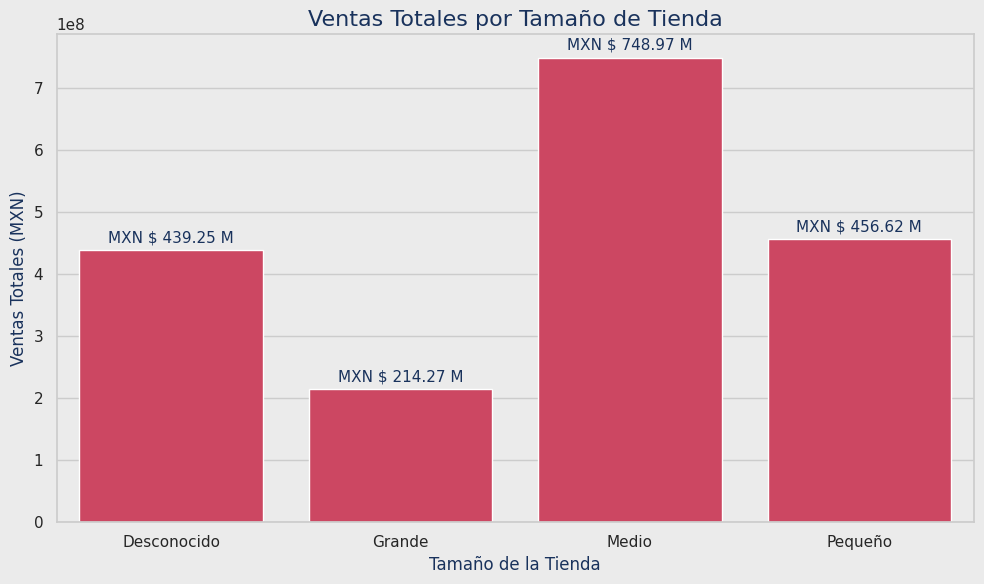

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumimos que df ya está cargado y contiene las columnas 'ventas_totales' y 'tienda_tamano'

# Agrupar los datos por 'tienda_tamano' y obtener la suma de 'ventas_totales' por cada categoría
ventas_por_tamano = df.groupby('tienda_tamano')['ventas_totales'].sum().reset_index()

# Configurar la figura con el color de fondo deseado
plt.figure(figsize=(10, 6), facecolor='#ebebeb')

# Crear el gráfico de barras
sns.barplot(data=ventas_por_tamano, x='tienda_tamano', y='ventas_totales', palette=['#e23155'])

# Personalizar el fondo del gráfico
plt.gca().set_facecolor('#ebebeb')

# Títulos y etiquetas
plt.title('Ventas Totales por Tamaño de Tienda', fontsize=16, color="#19325c")
plt.xlabel('Tamaño de la Tienda', fontsize=12, color="#19325c")
plt.ylabel('Ventas Totales (MXN)', fontsize=12, color="#19325c")

# Agregar las etiquetas encima de cada barra (mostrar las ventas en millones)
for i in range(len(ventas_por_tamano)):
    # Convertir las ventas totales a millones
    valor_ventas = ventas_por_tamano.loc[i, 'ventas_totales'] / 1_000_000
    # Agregar el texto encima de la barra
    plt.text(i, ventas_por_tamano.loc[i, 'ventas_totales'] + 0.01 * ventas_por_tamano['ventas_totales'].max(),
             f'MXN $ {valor_ventas:.2f} M', ha='center', va='bottom', fontsize=11, color='#19325c')

# Ajustar el diseño para que todo encaje bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "tienda_tipo" con 4 categorías de tipo para tiendas: 'Supermercado Tipo 1', 'Supermercado Tipo 2', 'Mercado', 'Supermercado Tipo 3'.

Deseo crear una visualización que permita identificar el total obtenido en ventas para las cuatro categorías de tipo de tienda y representarlas en un gráfico de barras.

Los datos en la columna "ventas_totales" deben ser agrupados por las categorías de "tienda_tipo".

La figura de la gráfica debe seguir la identidad visual de la tienda, con el fondo de la figura y de la gráfica en color "#ebebeb" y las barras en color "#e23155".

Además, es necesario mostrar el total de las ventas en millones sobre cada columna, con el texto de esa información en color "#19325c" y la estructura "MXN$ valor M".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

<ipython-input-261-e10b4fd5ef62>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_tipo_tienda, x='tienda_tipo', y='ventas_totales', palette=['#e23155'])
<ipython-input-261-e10b4fd5ef62>:14: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_por_tipo_tienda, x='tienda_tipo', y='ventas_totales', palette=['#e23155'])


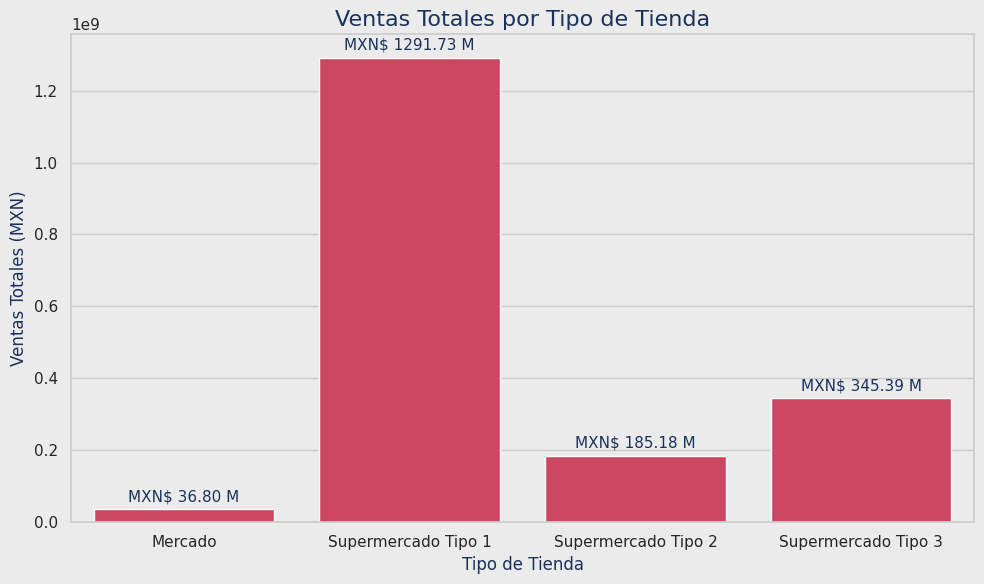

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suponemos que 'df' ya está cargado con las columnas 'ventas_totales' y 'tienda_tipo'

# Agrupar las ventas totales por 'tienda_tipo'
ventas_por_tipo_tienda = df.groupby('tienda_tipo')['ventas_totales'].sum().reset_index()

# Configurar la figura con el color de fondo deseado
plt.figure(figsize=(10, 6), facecolor='#ebebeb')

# Crear el gráfico de barras
sns.barplot(data=ventas_por_tipo_tienda, x='tienda_tipo', y='ventas_totales', palette=['#e23155'])

# Personalizar el fondo del gráfico
plt.gca().set_facecolor('#ebebeb')

# Títulos y etiquetas
plt.title('Ventas Totales por Tipo de Tienda', fontsize=16, color="#19325c")
plt.xlabel('Tipo de Tienda', fontsize=12, color="#19325c")
plt.ylabel('Ventas Totales (MXN)', fontsize=12, color="#19325c")

# Agregar las etiquetas encima de cada barra (mostrar las ventas en millones)
for i in range(len(ventas_por_tipo_tienda)):
    # Convertir las ventas totales a millones
    valor_ventas = ventas_por_tipo_tienda.loc[i, 'ventas_totales'] / 1_000_000
    # Agregar el texto encima de la barra
    plt.text(i, ventas_por_tipo_tienda.loc[i, 'ventas_totales'] + 0.01 * ventas_por_tipo_tienda['ventas_totales'].max(),
             f'MXN$ {valor_ventas:.2f} M', ha='center', va='bottom', fontsize=11, color='#19325c')

# Ajustar el diseño para que todo encaje bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "item_tipo" con 16 categorías de productos.

Deseo crear una visualización que permita identificar el total obtenido en ventas por categorías de productos en un gráfico de barras horizontales.

Los datos en la columna "ventas_totales" deben agruparse por las categorías de "item_tipo".

La figura de la representación debe seguir la identidad visual de la tienda, con el fondo de la figura y del gráfico en el color "#ebebeb".

Las barras deben estar en el color "#e23155".

Los valores de las barras deben estar ordenados para mantener un aspecto de embudo.

Además, es necesario mostrar el total de las ventas en millones dentro o al lado de cada barra, con el texto de esa información en el color "#19325c" y en la estructura "MXN$ valor M".

No muestres la cuadrícula en el gráfico.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

<ipython-input-271-24cf08bd999e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_item_tipo, y='item_tipo', x='ventas_totales', palette=['#e23155'])
<ipython-input-271-24cf08bd999e>:13: UserWarning: 
The palette list has fewer values (1) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_por_item_tipo, y='item_tipo', x='ventas_totales', palette=['#e23155'])


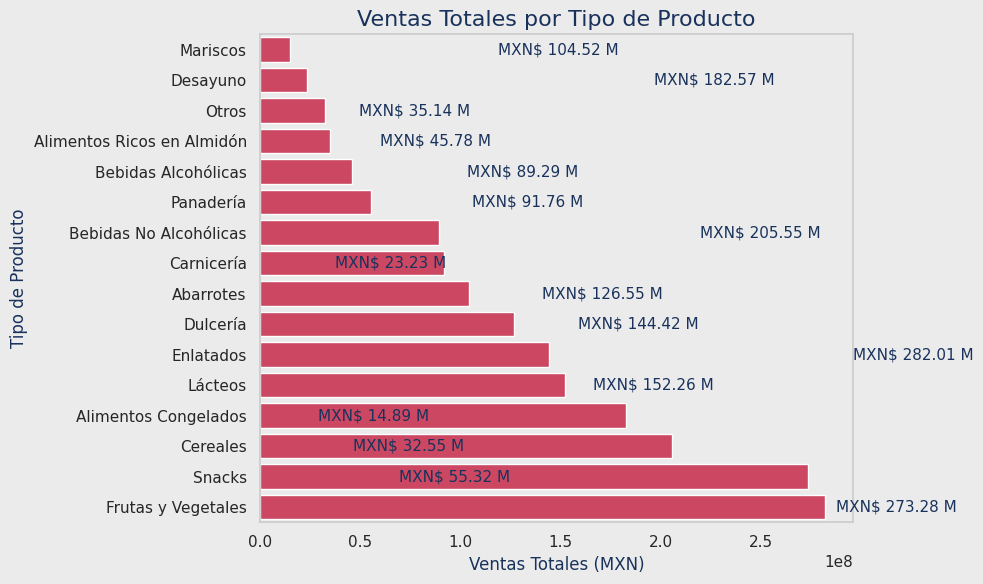

In [ ]:


# Asumimos que 'df' ya está cargado con las columnas 'ventas_totales' y 'item_tipo'

# Agrupar las ventas totales por 'item_tipo'
ventas_por_item_tipo = df.groupby('item_tipo')['ventas_totales'].sum().reset_index()

# Ordenar los valores de las ventas de mayor a menor
ventas_por_item_tipo = ventas_por_item_tipo.sort_values(by='ventas_totales', ascending=True)

# Configurar la figura con el color de fondo deseado
plt.figure(figsize=(10, 6), facecolor='#ebebeb')

# Crear el gráfico de barras horizontales
sns.barplot(data=ventas_por_item_tipo, y='item_tipo', x='ventas_totales', palette=['#e23155'])

# Personalizar el fondo del gráfico
plt.gca().set_facecolor('#ebebeb')

# Títulos y etiquetas
plt.title('Ventas Totales por Tipo de Producto', fontsize=16, color="#19325c")
plt.xlabel('Ventas Totales (MXN)', fontsize=12, color="#19325c")
plt.ylabel('Tipo de Producto', fontsize=12, color="#19325c")

# Eliminar la cuadrícula
plt.grid(False)

# Agregar las etiquetas de ventas en millones dentro de o al lado de las barras
for i in range(len(ventas_por_item_tipo)):
    # Convertir las ventas totales a millones
    valor_ventas = ventas_por_item_tipo.loc[i, 'ventas_totales'] / 1_000_000
    # Agregar el texto dentro o al lado de la barra
    plt.text(ventas_por_item_tipo.loc[i, 'ventas_totales'] + 0.05 * ventas_por_item_tipo['ventas_totales'].max(),
             i, f'MXN$ {valor_ventas:.2f} M', ha='left', va='center', fontsize=11, color='#19325c')

# Ajustar el diseño para que todo encaje bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()
